<font color=#00008b size=5 face="黑體">**載入基本 package**</font>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
import sklearn

<font color=#00008b size=5 face="黑體">**資料讀取. 探索. 處理**</font>

### 資料四 | [Telco Customer Churn](https://www.kaggle.com/blastchar/telco-customer-churn)

[**參考**](https://github.com/JHL01/Telcom-Customer-Churn)
  
  
**變數解釋**  
  
  
**預測變數**  
Churn (pos: yes , neg: no)  

In [3]:
telco_df = pd.read_csv('.\\data\\4.Telco-Customer-Churn.csv')
print('telco_df:', telco_df.shape)

telco_df: (7043, 21)


In [4]:
## 資料修正
# remove the meaningless column
del telco_df['customerID']

#'TotalCharges'空值代表尚未支付任何費用，以0代替
telco_df['TotalCharges'] = telco_df['TotalCharges'].replace(" ", 0).astype('float32')

#replace values
telco_df["SeniorCitizen"] = telco_df["SeniorCitizen"].replace({1: "Yes", 0: "No"})

telco_df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.850000,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.500000,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.150002,Yes


In [5]:
# split data by the label
telco_pos = telco_df[telco_df['Churn'] == "Yes"]
telco_neg = telco_df[telco_df['Churn'] == "No"]
telco_df["Churn_n"] = telco_df["Churn"].map({"Yes":1, "No":0})

In [6]:
data_y = telco_df.Churn
print(data_y.value_counts())
print('\npos% :', data_y.value_counts()[1]/len(data_y))

No     5174
Yes    1869
Name: Churn, dtype: int64

pos% : 0.2653698707936959


In [7]:
# 資料基本描述
def data_explore(df):
    print("*Missing values :  ", df.isnull().sum().values.sum())
    print("*duplicate values :  ", df.duplicated().sum(), sep='')
    print("*Unique values & feature type : ")
    display(pd.DataFrame({'unique values':df.nunique(), 'feature type':df.dtypes}))

# 區分連續與量化資料
def split_data_by_feature_types(df):
    df_categorial, df_quantitative = [], []
    for col_name, types in zip(df.columns, df.dtypes):
        if types in ['object','bool']:
            df_categorial.append(col_name)
        else:
            df_quantitative.append(col_name)
    df_categorial = df[df_categorial]
    df_quantitative = df[df_quantitative]
    
    return df_categorial, df_quantitative

data_explore(telco_df)
telco_categorial, telco_quantitative = split_data_by_feature_types(telco_df)

*Missing values :   0
*duplicate values :  22
*Unique values & feature type : 


,unique values,feature type
gender,2,object
SeniorCitizen,2,object
Partner,2,object
Dependents,2,object
tenure,73,int64
PhoneService,2,object
MultipleLines,3,object
InternetService,3,object
OnlineSecurity,3,object
OnlineBackup,3,object


In [8]:
telco_categorial.columns.drop("Churn")

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

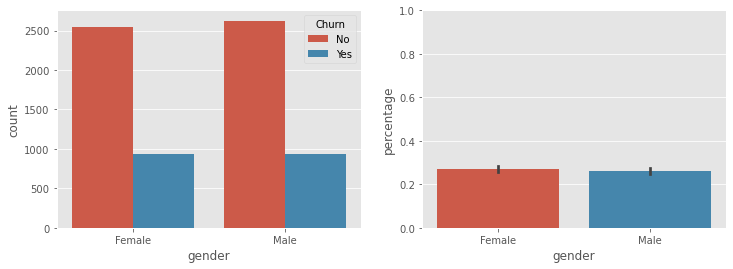

In [34]:
# 類別變數繪圖 (countplot, barplot) -- gender
feature = "gender"
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4))
ax1 = sns.countplot(x=feature, data=telco_df, hue="Churn", ax=axes[0])
ax2 = sns.barplot(x=feature, y='Churn_n', data=telco_df, ax=axes[1])
ax2.set_ylabel('percentage')
ax2.set(ylim=(0, 1))
plt.show()

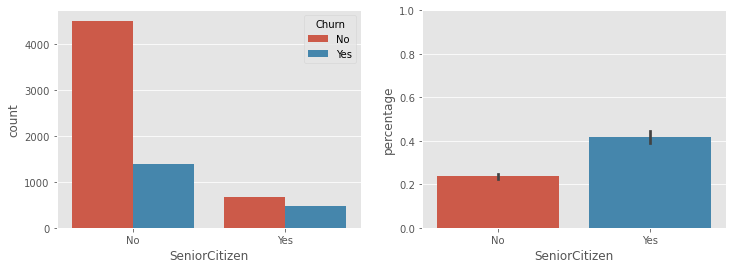

In [35]:
# 類別變數繪圖 (countplot, barplot) -- SeniorCitizen: Whether the customer is a senior citizen or not 
feature = "SeniorCitizen"
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4))
ax1 = sns.countplot(x=feature, data=telco_df, hue="Churn", ax=axes[0])
ax2 = sns.barplot(x=feature, y='Churn_n', data=telco_df, ax=axes[1])
ax2.set_ylabel('percentage')
ax2.set(ylim=(0, 1))
plt.show()

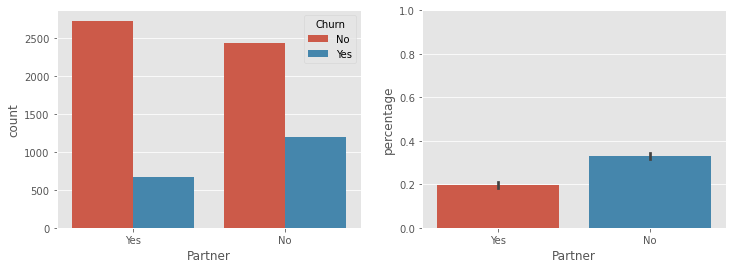

In [36]:
# 類別變數繪圖 (countplot, barplot) -- Partner: Whether the customer has a partner or not 
feature = "Partner"
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4))
ax1 = sns.countplot(x=feature, data=telco_df, hue="Churn", ax=axes[0])
ax2 = sns.barplot(x=feature, y='Churn_n', data=telco_df, ax=axes[1])
ax2.set_ylabel('percentage')
ax2.set(ylim=(0, 1))
plt.show()

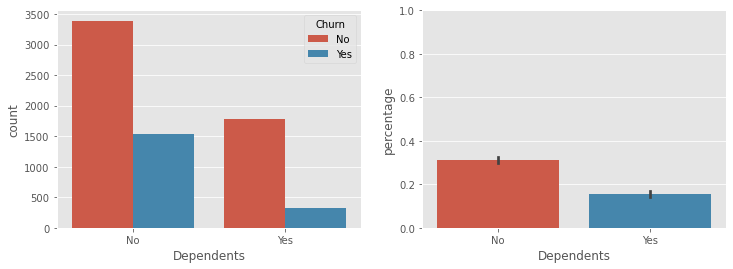

In [37]:
# 類別變數繪圖 (countplot, barplot) -- Dependents: Whether the customer has dependents or not
feature = "Dependents"
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4))
ax1 = sns.countplot(x=feature, data=telco_df, hue="Churn", ax=axes[0])
ax2 = sns.barplot(x=feature, y='Churn_n', data=telco_df, ax=axes[1])
ax2.set_ylabel('percentage')
ax2.set(ylim=(0, 1))
plt.show()

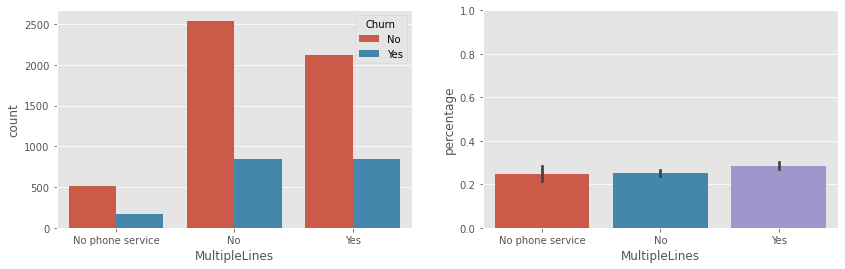

In [28]:
# 類別變數繪圖 (countplot, barplot) -- MultipleLines: Whether the customer has multiple lines or not
feature = "MultipleLines"
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (14,4))
ax1 = sns.countplot(x=feature, data=telco_df, hue="Churn", ax=axes[0])
ax2 = sns.barplot(x=feature, y='Churn_n', data=telco_df, ax=axes[1])
ax2.set_ylabel('percentage')
ax2.set(ylim=(0, 1))
plt.show()

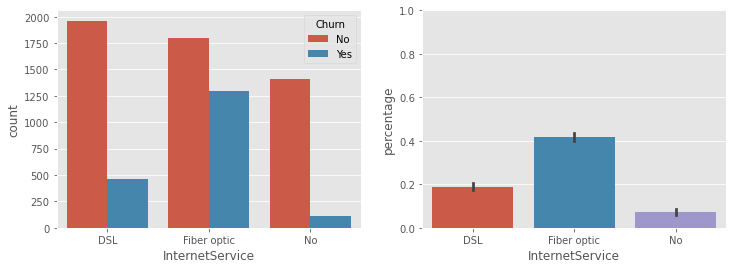

In [38]:
# 類別變數繪圖 (countplot, barplot) -- InternetService: Customer’s internet service provider
feature = "InternetService"
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4))
ax1 = sns.countplot(x=feature, data=telco_df, hue="Churn", ax=axes[0])
ax2 = sns.barplot(x=feature, y='Churn_n', data=telco_df, ax=axes[1])
ax2.set_ylabel('percentage')
ax2.set(ylim=(0, 1))
plt.show()

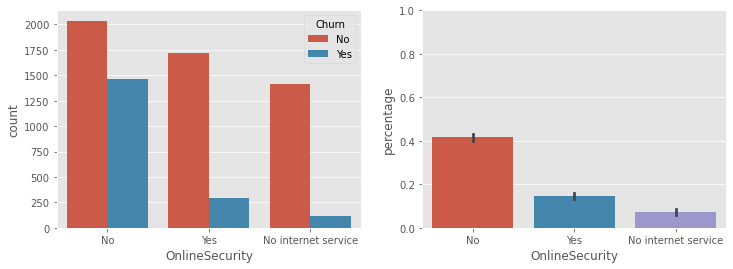

In [39]:
# 類別變數繪圖 (countplot, barplot) -- OnlineSecurity: Whether the customer has online security or not
feature = "OnlineSecurity"
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4))
ax1 = sns.countplot(x=feature, data=telco_df, hue="Churn", ax=axes[0])
ax2 = sns.barplot(x=feature, y='Churn_n', data=telco_df, ax=axes[1])
ax2.set_ylabel('percentage')
ax2.set(ylim=(0, 1))
plt.show()

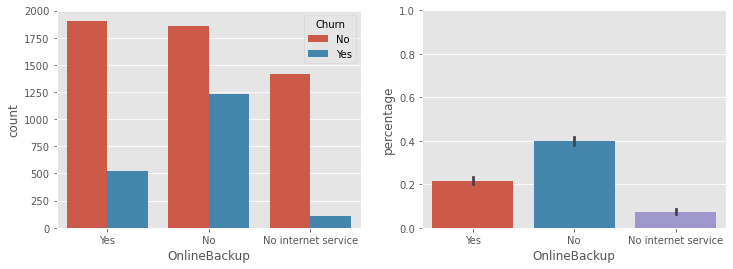

In [40]:
# 類別變數繪圖 (countplot, barplot) -- OnlineBackup: Whether the customer has online backup(備份) or not
feature = "OnlineBackup"
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4))
ax1 = sns.countplot(x=feature, data=telco_df, hue="Churn", ax=axes[0])
ax2 = sns.barplot(x=feature, y='Churn_n', data=telco_df, ax=axes[1])
ax2.set_ylabel('percentage')
ax2.set(ylim=(0, 1))
plt.show()

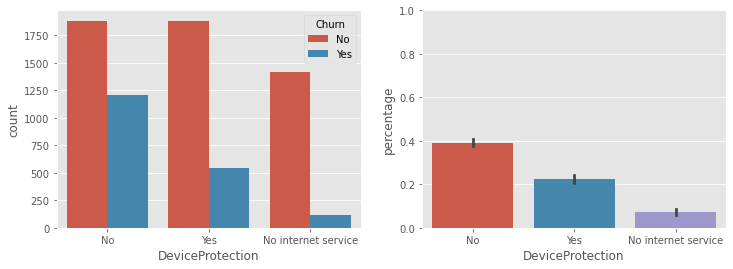

In [41]:
# 類別變數繪圖 (countplot, barplot) -- DeviceProtection: Whether the customer has device protection or not
feature = "DeviceProtection"
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4))
ax1 = sns.countplot(x=feature, data=telco_df, hue="Churn", ax=axes[0])
ax2 = sns.barplot(x=feature, y='Churn_n', data=telco_df, ax=axes[1])
ax2.set_ylabel('percentage')
ax2.set(ylim=(0, 1))
plt.show()

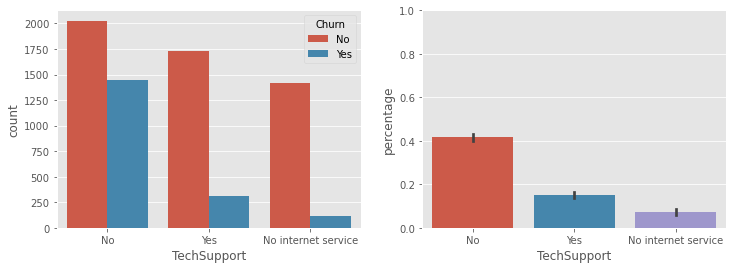

In [42]:
# 類別變數繪圖 (countplot, barplot) -- TechSupport: Whether the customer has tech support or not
feature = "TechSupport"
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4))
ax1 = sns.countplot(x=feature, data=telco_df, hue="Churn", ax=axes[0])
ax2 = sns.barplot(x=feature, y='Churn_n', data=telco_df, ax=axes[1])
ax2.set_ylabel('percentage')
ax2.set(ylim=(0, 1))
plt.show()

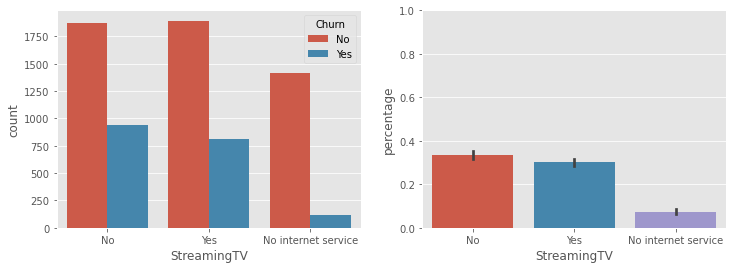

In [43]:
# 類別變數繪圖 (countplot, barplot) -- StreamingTV
feature = "StreamingTV"
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4))
ax1 = sns.countplot(x=feature, data=telco_df, hue="Churn", ax=axes[0])
ax2 = sns.barplot(x=feature, y='Churn_n', data=telco_df, ax=axes[1])
ax2.set_ylabel('percentage')
ax2.set(ylim=(0, 1))
plt.show()

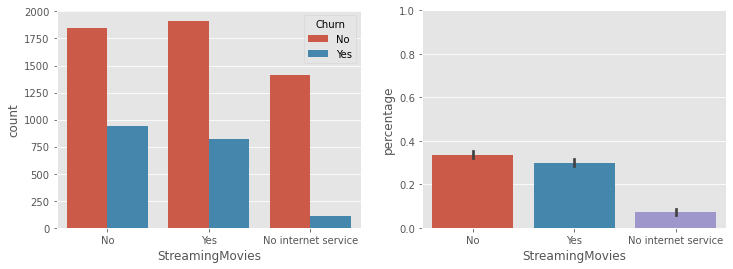

In [44]:
# 類別變數繪圖 (countplot, barplot) -- StreamingMovies
feature = "StreamingMovies"
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4))
ax1 = sns.countplot(x=feature, data=telco_df, hue="Churn", ax=axes[0])
ax2 = sns.barplot(x=feature, y='Churn_n', data=telco_df, ax=axes[1])
ax2.set_ylabel('percentage')
ax2.set(ylim=(0, 1))
plt.show()

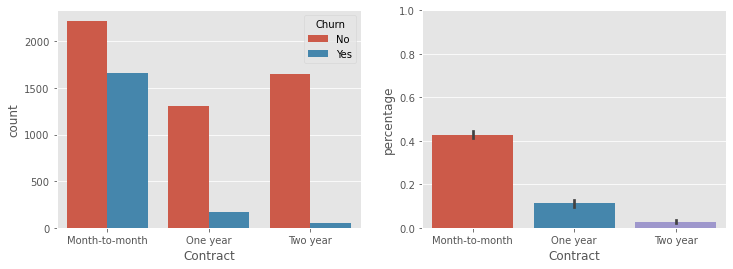

In [45]:
# 類別變數繪圖 (countplot, barplot) -- Contract: The contract term of the customer
feature = "Contract"
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4))
ax1 = sns.countplot(x=feature, data=telco_df, hue="Churn", ax=axes[0])
ax2 = sns.barplot(x=feature, y='Churn_n', data=telco_df, ax=axes[1])
ax2.set_ylabel('percentage')
ax2.set(ylim=(0, 1))
plt.show()

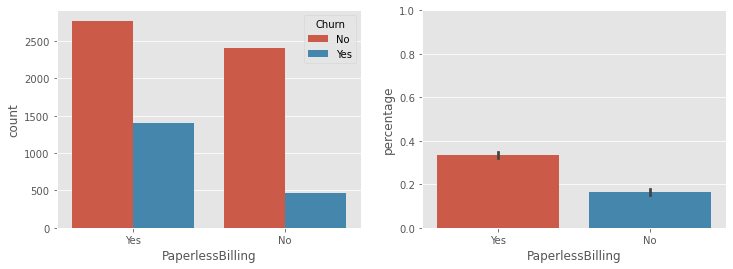

In [46]:
# 類別變數繪圖 (countplot, barplot) -- PaperlessBilling: Whether the customer has paperless billing or not 
feature = "PaperlessBilling"
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4))
ax1 = sns.countplot(x=feature, data=telco_df, hue="Churn", ax=axes[0])
ax2 = sns.barplot(x=feature, y='Churn_n', data=telco_df, ax=axes[1])
ax2.set_ylabel('percentage')
ax2.set(ylim=(0, 1))
plt.show()

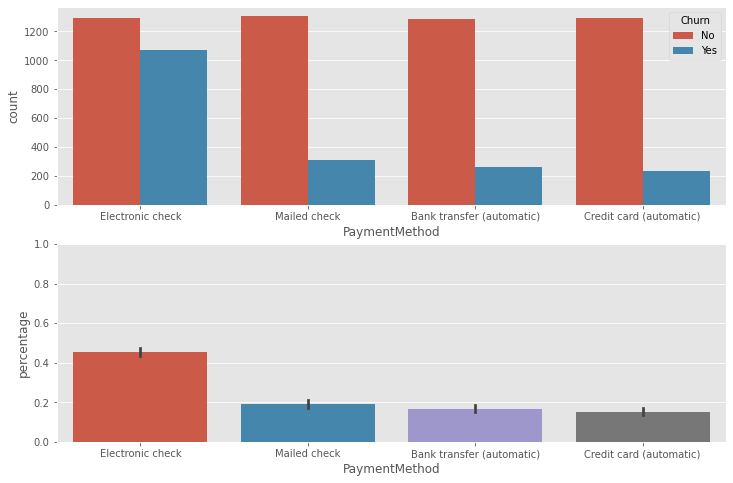

In [47]:
# 類別變數繪圖 (countplot, barplot) -- PaymentMethod: The customer’s payment method
feature = "PaymentMethod"
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (12,8))
ax1 = sns.countplot(x=feature, data=telco_df, hue="Churn", ax=axes[0])
ax2 = sns.barplot(x=feature, y='Churn_n', data=telco_df, ax=axes[1])
ax2.set_ylabel('percentage')
ax2.set(ylim=(0, 1))
plt.show()

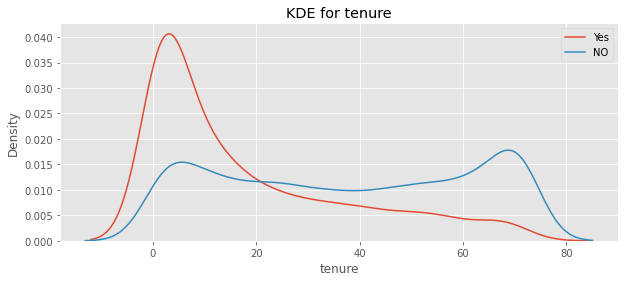

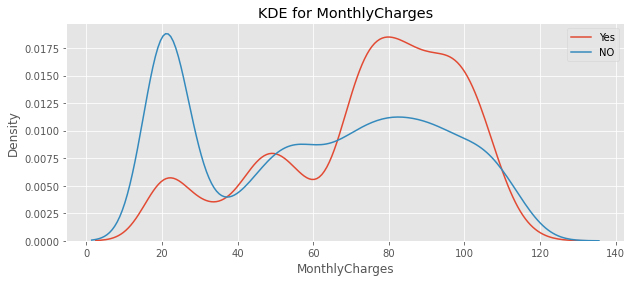

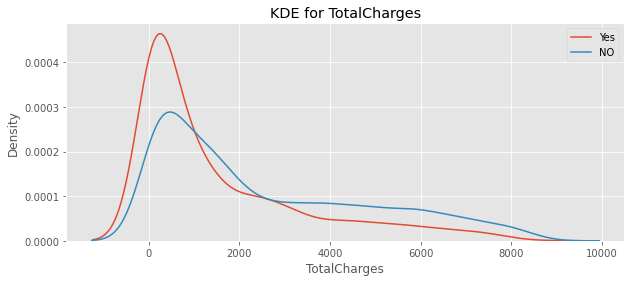

In [48]:
# 量化變數繪圖 (KDE plot)
for feature in telco_quantitative.columns.drop("Churn_n"):
    plt.figure(figsize=(10,4))
    plt.title("KDE for {}".format(feature))
    sns.kdeplot(telco_pos[feature], label='Yes')
    sns.kdeplot(telco_neg[feature], label='NO')
    plt.legend()
    plt.show()

<AxesSubplot:>

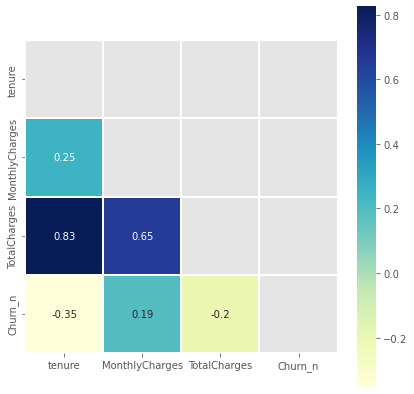

In [49]:
plt.figure(figsize=(7, 7))
corr = telco_df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, xticklabels=corr.columns,mask=mask, yticklabels=corr.columns, square=True,
                  linewidths=.2, cmap="YlGnBu",annot=True)

In [51]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 區分連續與量化資料
telco_categorial, telco_quantitative = split_data_by_feature_types(telco_df)

telco_X = telco_df.drop(columns=['Churn', 'Churn_n'])
telco_y_f = ["Churn"] #目標變數
cat_cols   = telco_categorial.columns.drop("Churn")  #類別變數
num_cols   = telco_quantitative.columns.drop("Churn_n")  #數值變數
bin_cols   = telco_X.nunique()[telco_X.nunique() == 2].keys().tolist()  #二元變數
multi_cols = [i for i in cat_cols if i not in bin_cols]  #多元變數

#對二元變數編碼
encoder = LabelEncoder()
for i in bin_cols :
    telco_X[i] = encoder.fit_transform(telco_X[i])
    
#對多元變數編碼
telco_X = pd.get_dummies(data = telco_X, columns = multi_cols)

#標準化數值變數
std = StandardScaler()
telco_X[num_cols] = std.fit_transform(telco_X[num_cols])

In [55]:
telco_X.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit 

In [65]:
telco_X[['InternetService_No', 'OnlineSecurity_No internet service', 'OnlineBackup_No internet service', 
'DeviceProtection_No internet service', 'TechSupport_No internet service', 
'StreamingTV_No internet service', 'StreamingMovies_No internet service']].sum(axis=0)

InternetService_No                      1526
OnlineSecurity_No internet service      1526
OnlineBackup_No internet service        1526
DeviceProtection_No internet service    1526
TechSupport_No internet service         1526
StreamingTV_No internet service         1526
StreamingMovies_No internet service     1526
dtype: int64